In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 파일 읽기
file_path = './data/온도변화.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path)

# 2. 데이터 구조 확인
print(data)  # 데이터의 처음 몇 줄을 출력해 구조 확인

      년도  여름평균온도  겨울평균온도   평균온도
0   2000    28.7   1.450  13.40
1   2001    28.8   2.580  13.69
2   2002    27.5   2.030  13.53
3   2003    26.2   2.420  13.36
4   2004    28.5   1.620  14.14
5   2005    28.2   0.840  13.12
6   2006    27.7   3.510  13.66
7   2007    27.6   1.830  14.10
8   2008    27.8   2.740  13.88
9   2009    27.5   1.470  13.81
10  2010    28.7   0.280  13.50
11  2011    27.8   0.560  13.23
12  2012    28.8  -0.025  13.22
13  2013    28.5   2.580  13.82
14  2014    28.7   1.680  14.05
15  2015    28.2   2.430  14.21
16  2016    29.2   2.500  14.34
17  2017    29.0   0.240  13.92
18  2018    29.9   2.310  13.84
19  2019    28.4   4.080  14.39
20  2020    28.0   2.310  14.06
21  2021    28.8   1.660  14.53
22  2022    28.9   1.570  14.11
23  2023    29.1   3.590  14.78


In [33]:
data.columns = ['Year', '여름평균온도', '겨울평균온도','평균온도']  # 필요한 열 이름으로 재설정

In [35]:
data = pd.read_excel(file_path, header=1)  # 필요 시 header=1로 조정
data = data.dropna(how='all', axis=1)  # 빈 열 제거
data = data.dropna(how='all', axis=0)  # 빈 행 제거

In [37]:
# 데이터 누락 확인
print("Original Columns:", data.columns)  # 원래 열 이름 확인
data.columns = ['Year', 'Month', 'Temperature']  # 필요한 열 이름으로 수정

# 데이터 확인
print(data.head())  # 데이터의 처음 몇 줄 출력


Original Columns: Index([2000.0, 28.7, 1.45, 13.4], dtype='float64')


ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

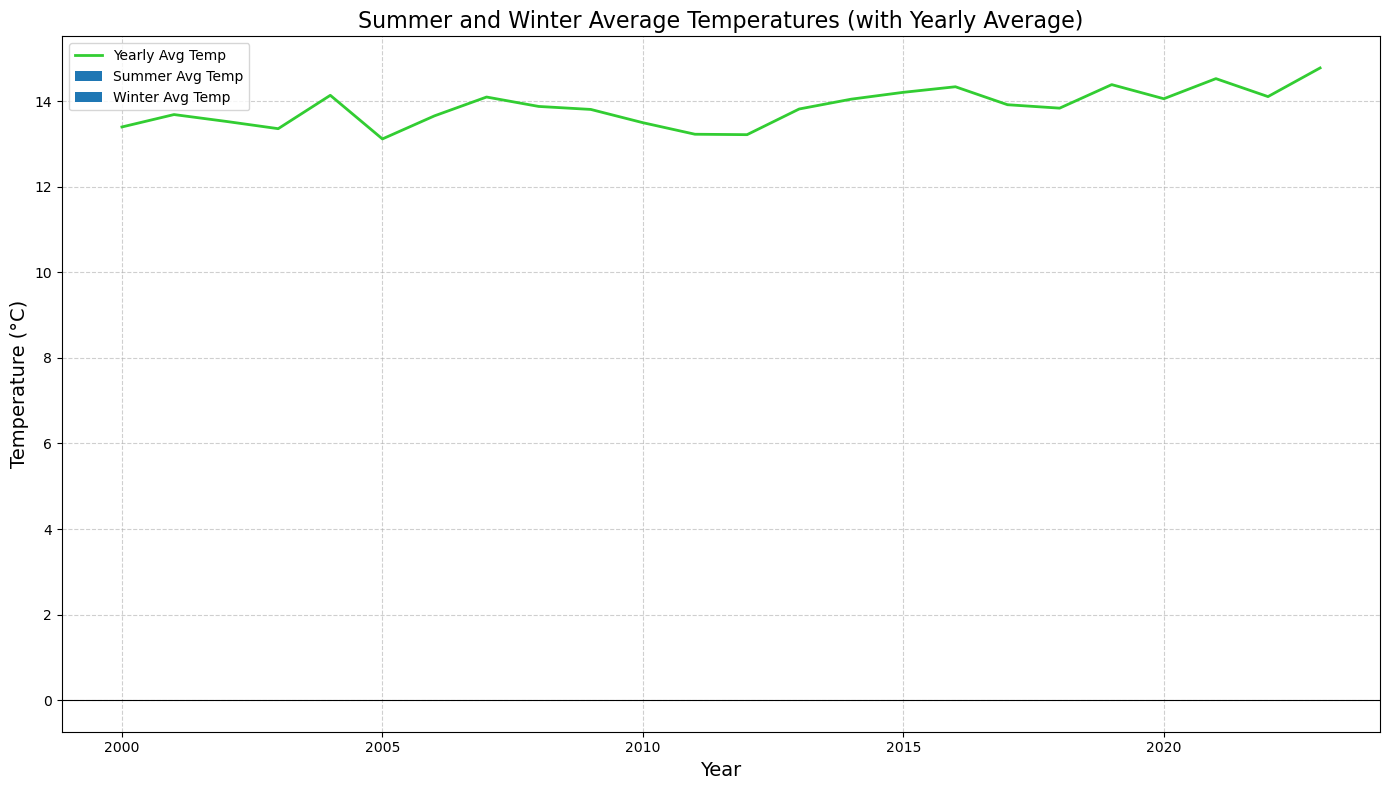

In [25]:

# 3. 여름과 겨울 평균 온도 계산
# 데이터에 'Month', 'Year', 'Temperature'가 있다고 가정
data['Season'] = data['년도'].apply(lambda x: 'Summer' if x in [6, 7, 8] else ('Winter' if x in [12, 1, 2] else None))

# 연도별 여름 및 겨울 평균 온도 계산
summer_avg = data[data['Season'] == 'Summer'].groupby('년도')['여름평균온도'].mean()
winter_avg = data[data['Season'] == 'Winter'].groupby('년도')['겨울평균온도'].mean()

# 연도별 전체 평균 온도 계산
yearly_avg = data.groupby('년도')['평균온도'].mean()

# 4. 그래프 그리기
plt.figure(figsize=(14, 8))

# 여름 평균 온도: 막대 그래프 (위쪽 방향)
plt.bar(summer_avg.index, summer_avg, summer_avg - yearly_avg[summer_avg.index], color='orange', label='Summer Avg Temp', alpha=0.7)

# 겨울 평균 온도: 막대 그래프 (아래쪽 방향)
plt.bar(winter_avg.index, winter_avg  - yearly_avg[winter_avg.index],  color='blue', label='Winter Avg Temp', alpha=0.7)  # 음수 처리

# 연간 평균 온도: 실선 그래프
plt.plot(yearly_avg.index, yearly_avg, color='limegreen', label='Yearly Avg Temp', linewidth=2)


# 5. 그래프 꾸미기
plt.axhline(0, color='black', linewidth=0.8)  # 기준선 (0°C)
plt.title('Summer and Winter Average Temperatures (with Yearly Average)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# 6. 그래프 출력
plt.show()